<a href="https://colab.research.google.com/github/elaineliu05/DS3021_MurderProject/blob/main/Offender_Demographics_Prediction_in_the_unsolved_cases_of_Southern_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Murder Mystery - Who are the <b>suspects on the run</b> in the unsolved cases in the South Eastern States of the US


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('SHR65_23 (2).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894636 entries, 0 to 894635
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            894636 non-null  object 
 1   CNTYFIPS      894636 non-null  object 
 2   Ori           894636 non-null  object 
 3   State         894636 non-null  object 
 4   Agency        894636 non-null  object 
 5   Agentype      894636 non-null  object 
 6   Source        894636 non-null  object 
 7   Solved        894636 non-null  object 
 8   Year          894636 non-null  int64  
 9   Month         894636 non-null  object 
 10  Incident      894636 non-null  int64  
 11  ActionType    894636 non-null  object 
 12  Homicide      894636 non-null  object 
 13  Situation     894636 non-null  object 
 14  VicAge        894636 non-null  int64  
 15  VicSex        894636 non-null  object 
 16  VicRace       894636 non-null  object 
 17  VicEthnic     894636 non-null  object 
 18  OffA

In [120]:
df.head(5)

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
0,197603001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,March,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
1,197604001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,April,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
2,197606001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Other,NaN,0,0,30180.0,"Anchorage, AK"
3,197606002AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
4,197607001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,July,...,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"


# Data Cleaning - Renaming, dropping null value columns, and dropping useless columns

In [121]:
rename_columns = {
    'CNTYFIPS': 'CountyFIPS',
    'Ori': 'OriginatingAgencyID',
    'Agency': 'AgencyName',
    'Agentype': 'AgencyType',
    'Source': 'SourceAgency',
    'Solved': 'SolvedStatus',
    'Year': 'YearReported',
    'Month': 'MonthReported',
    'Incident': 'IncidentID',
    'ActionType': 'ReportActionType',
    'Homicide': 'HomicideType',
    'Situation': 'CrimeSituation',
    'VicAge': 'VictimAge',
    'VicSex': 'VictimSex',
    'VicRace': 'VictimRace',
    'VicEthnic': 'VictimEthnicity',
    'OffAge': 'OffenderAge',
    'OffSex': 'OffenderSex',
    'OffRace': 'OffenderRace',
    'OffEthnic': 'OffenderEthnicity',
    'Weapon': 'WeaponUsed',
    'Relationship': 'VictimOffenderRelationship',
    'Circumstance': 'CrimeCircumstance',
    'Subcircum': 'CrimeSubCircumstance',
    'VicCount': 'AdditionalVictimCount',
    'OffCount': 'AdditionalOffenderCount',
    'FileDate': 'RecordFileDate',
    'MSA': 'MetropolitanArea'
}

df.rename(columns=rename_columns, inplace=True)

# Drop useless or high-null columns
columns_to_drop = ['CrimeSubCircumstance', 'OriginatingAgencyID', 'SourceAgency','RecordFileDate', 'ID', 'OffenderEthnicity']
df.drop(columns=columns_to_drop, inplace=True)

df


,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,VictimEthnicity,OffenderAge,OffenderSex,OffenderRace,WeaponUsed,VictimOffenderRelationship,CrimeCircumstance,AdditionalVictimCount,AdditionalOffenderCount,MetropolitanArea
0,"Anchorage, AK",Alaska,Anchorage,Municipal police,Yes,1976,March,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,68,Male,Black,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,0,0,"Anchorage, AK"
1,"Anchorage, AK",Alaska,Anchorage,Municipal police,Yes,1976,April,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,44,Male,White,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,0,0,"Anchorage, AK"
2,"Anchorage, AK",Alaska,Anchorage,Municipal police,Yes,1976,June,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,27,Male,Black,"Handgun - pistol, revolver, etc",Stranger,Other,0,0,"Anchorage, AK"
3,"Anchorage, AK",Alaska,Anchorage,Municipal police,Yes,1976,June,2,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,34,Male,White,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,0,0,"Anchorage, AK"
4,"Anchorage, AK",Alaska,Anchorage,Municipal police,Yes,1976,July,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,37,Female,American Indian or Alaskan Native,Knife or cutting instrument,Brother,Other arguments,0,0,"Anchorage, AK"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894631,"Fremont, WY",Wyoming,Wind River Agency,Tribal,No,2018,August,1,Normal update,Murder and non-negligent manslaughter,...,Not of Hispanic origin,999,Unknown,Unknown,Shotgun,Other - known to victim,Narcotic drug laws,0,0,Rural Wyoming
894632,"Fremont, WY",Wyoming,Wind River Agency,Tribal,Yes,2019,August,1,Normal update,Murder and non-negligent manslaughter,...,Not of Hispanic origin,30,Male,American Indian or Alaskan Native,"Firearm, type not stated",Acquaintance,Other,0,0,Rural Wyoming
894633,"Fremont, WY",Wyoming,Wind River Agency,Tribal,Yes,2023,March,2,Normal update,Murder and non-negligent manslaughter,...,Not of Hispanic origin,33,Male,American Indian or Alaskan Native,"Firearm, type not stated",Other - known to victim,Circumstances undetermined,0,0,Rural Wyoming
894634,"Fremont, WY",Wyoming,Wind River Agency,Tribal,Yes,2023,March,1,Normal update,Murder and non-negligent manslaughter,...,Not of Hispanic origin,29,Male,American Indian or Alaskan Native,Other or type unknown,Relationship not determined,Other,0,0,Rural Wyoming


In [122]:
df.isnull().sum()

,0
CountyFIPS,0
State,0
AgencyName,0
AgencyType,0
SolvedStatus,0
YearReported,0
MonthReported,0
IncidentID,0
ReportActionType,0
HomicideType,0


In [123]:
print(df['CrimeCircumstance'].value_counts(), '\n')
print(df['CrimeSituation'].value_counts())

CrimeCircumstance
Circumstances undetermined              249629
Other arguments                         226885
Other                                   115227
Robbery                                  62407
Narcotic drug laws                       32289
Other - not specified                    31591
Juvenile gang killings                   25999
Felon killed by police                   19007
Brawl due to influence of alcohol        16340
Argument over money or property          16015
Felon killed by private citizen          15758
All suspected felony type                13862
Lovers triangle                          12707
All other manslaughter by negligence     12214
Burglary                                  6910
Gangland killings                         6860
Brawl due to influence of narcotics       5257
Arson                                     5162
Other negligent handling of gun           4680
Rape                                      4281
Children playing with gun                 

# Cleaning outliers in the age variable

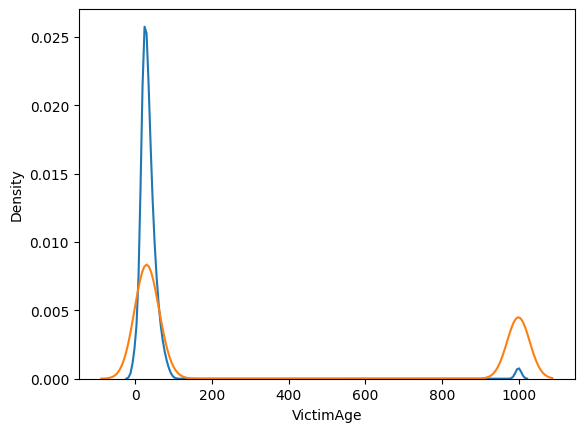

In [124]:
# cleaning the age variable
sns.kdeplot(df['VictimAge'])
sns.kdeplot(df['OffenderAge'])
plt.show()

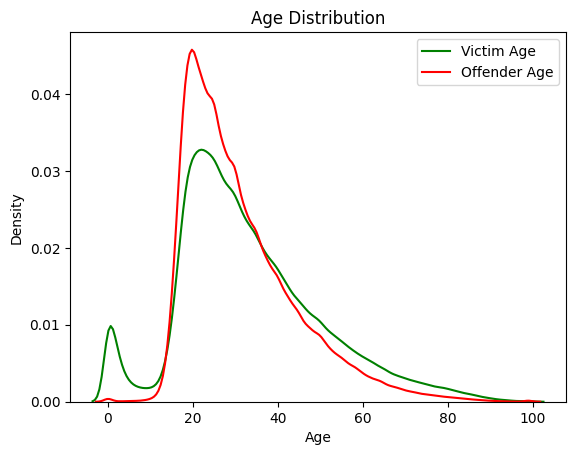

In [125]:
df = df[df['VictimAge'] != 999]
df = df[df['OffenderAge'] != 999]
sns.kdeplot(df['VictimAge'], color='green', label='Victim Age')
sns.kdeplot(df['OffenderAge'], color='red', label='Offender Age')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()

# Find out about what's missing in the unsolved cases in the demographic dataset

## First by examining the unsolved cases

In [126]:
df_unsolved = df[df['SolvedStatus'] == 'No']
df_unsolved.head(5)

,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,VictimEthnicity,OffenderAge,OffenderSex,OffenderRace,WeaponUsed,VictimOffenderRelationship,CrimeCircumstance,AdditionalVictimCount,AdditionalOffenderCount,MetropolitanArea
673,"Anchorage, AK",Alaska,Anchorage,Municipal police,No,2012,July,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,28,Unknown,Unknown,"Firearm, type not stated",Stranger,Felon killed by private citizen,0,1,"Anchorage, AK"
1403,"Aleutians West, AK",Alaska,Unalaska,Municipal police,No,2012,February,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,34,Unknown,Unknown,"Personal weapons, includes beating",Acquaintance,Other arguments,0,1,Rural Alaska
2309,"Anchorage, AK",Alaska,Alaska State Troopers,Primary state LE,No,2019,December,2,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,99,Unknown,Unknown,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,0,0,"Anchorage, AK"
4482,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1989,November,5,Adjustment,Murder and non-negligent manslaughter,...,Unknown or not reported,20,Unknown,Unknown,"Handgun - pistol, revolver, etc",Relationship not determined,Other,0,1,"Birmingham-Hoover, AL"
4625,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,January,5,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,24,Unknown,Unknown,"Handgun - pistol, revolver, etc",Stranger,Circumstances undetermined,0,1,"Birmingham-Hoover, AL"


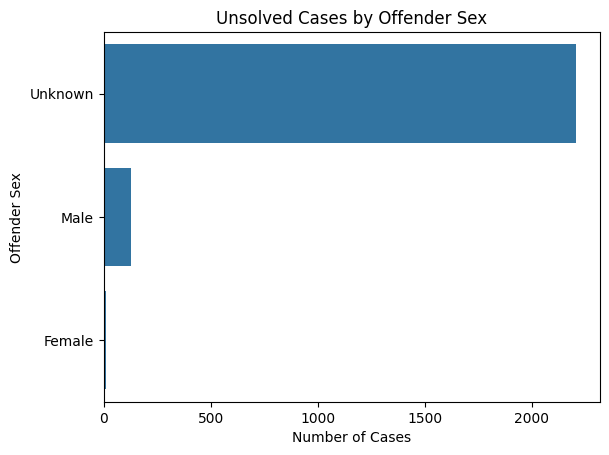

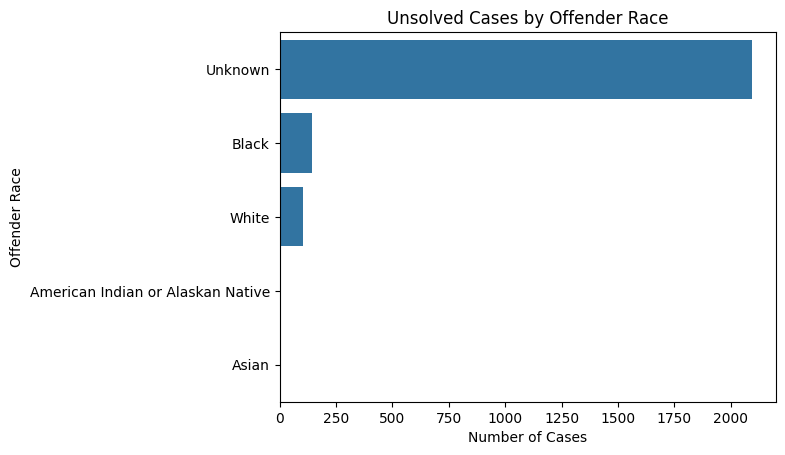

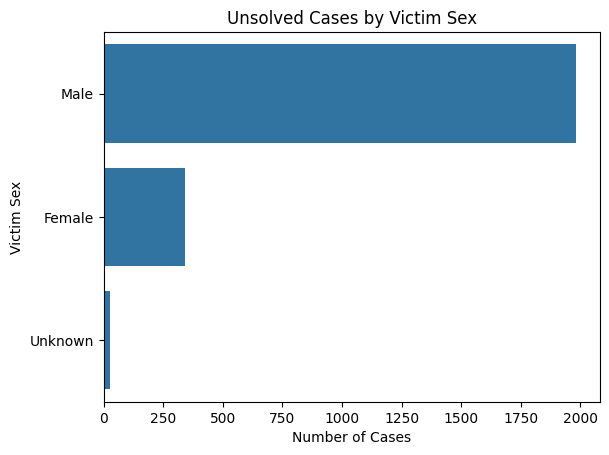

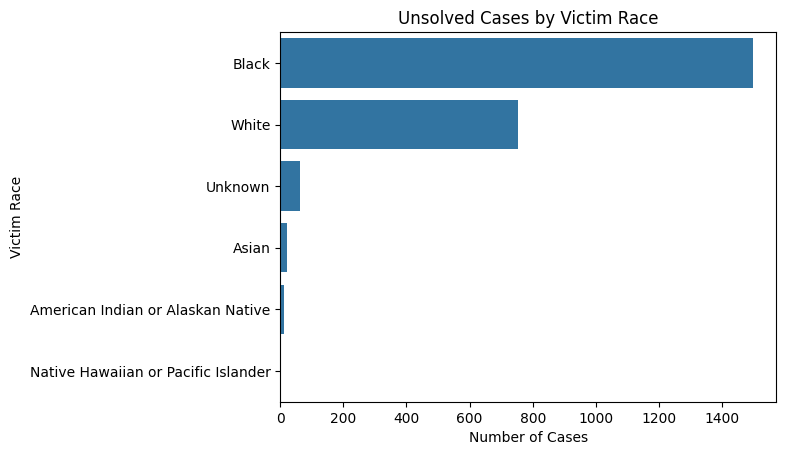

In [127]:
sex_counts = df_unsolved['OffenderSex'].value_counts().reset_index()
sex_counts.columns = ['OffenderSex', 'CaseCount']
race_counts = df_unsolved['OffenderRace'].value_counts().reset_index()
race_counts.columns = ['OffenderRace', 'CaseCount']

vic_sex_counts = df_unsolved['VictimSex'].value_counts().reset_index()
vic_sex_counts.columns = ['VictimSex', 'CaseCount']

vic_race_counts = df_unsolved['VictimRace'].value_counts().reset_index()
vic_race_counts.columns = ['VictimRace', 'CaseCount']

sns.barplot(data=sex_counts, x='CaseCount', y='OffenderSex', orient='h')
plt.title('Unsolved Cases by Offender Sex')
plt.xlabel('Number of Cases')
plt.ylabel('Offender Sex')
plt.show()

sns.barplot(race_counts,x='CaseCount', y='OffenderRace', orient='h')
plt.title('Unsolved Cases by Offender Race')
plt.xlabel('Number of Cases')
plt.ylabel('Offender Race')
plt.show()

sns.barplot(data=vic_sex_counts, x='CaseCount', y='VictimSex', orient='h')
plt.title('Unsolved Cases by Victim Sex')
plt.xlabel('Number of Cases')
plt.ylabel('Victim Sex')
plt.show()

sns.barplot(vic_race_counts,x='CaseCount', y='VictimRace', orient='h')
plt.title('Unsolved Cases by Victim Race')
plt.xlabel('Number of Cases')
plt.ylabel('Victim Race')
plt.show()


In [128]:
print(df_unsolved['CrimeSituation'].value_counts(), '\n')
print(df_unsolved['WeaponUsed'].value_counts(), '\n')
print(df_unsolved['VictimOffenderRelationship'].value_counts())


CrimeSituation
Single victim/single offender           1388
Single victim/unknown offender(s)        386
Single victim/multiple offenders         328
Multiple victims/single offender         146
Multiple victims/multiple offenders       60
Multiple victims/unknown offender(s)      41
Name: count, dtype: int64 

WeaponUsed
Firearm, type not stated                880
Handgun - pistol, revolver, etc         816
Other or type unknown                   216
Knife or cutting instrument             139
Other gun                                83
Rifle                                    65
Personal weapons, includes beating       54
Blunt object - hammer, club, etc         38
Shotgun                                  23
Narcotics or drugs, sleeping pills       21
Fire                                      9
Weapon Not Reported                       2
Poison - does not include gas             1
Asphyxiation - includes death by gas      1
Explosives                                1
Name: count, dty

# <b>Predicting demographic features of unsolved cases based off solved cases

## Virginia - predicting Offender Age, Race, Gender, and VictimOffenderRelationship

In [129]:
df[df['State'].isin(['Virginia', 'Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'West Virginia', 'Tennessee', 'North Carolina', 'South Carolina', 'Maryland'])]

,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,VictimEthnicity,OffenderAge,OffenderSex,OffenderRace,WeaponUsed,VictimOffenderRelationship,CrimeCircumstance,AdditionalVictimCount,AdditionalOffenderCount,MetropolitanArea
2426,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,2,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,37,Female,Black,"Handgun - pistol, revolver, etc",Friend,Brawl due to influence of alcohol,0,0,"Birmingham-Hoover, AL"
2427,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,20,Male,White,Shotgun,Father,Other arguments,0,1,"Birmingham-Hoover, AL"
2428,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,3,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,16,Male,Black,Shotgun,Stranger,Robbery,2,1,"Birmingham-Hoover, AL"
2429,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,3,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,16,Male,Black,Shotgun,Stranger,Robbery,2,1,"Birmingham-Hoover, AL"
2430,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,3,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,16,Male,Black,Shotgun,Stranger,Robbery,2,1,"Birmingham-Hoover, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893700,"Mingo, WV",West Virginia,State Police: Gilbert,Primary state LE,Yes,2006,December,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,46,Male,White,"Firearm, type not stated",Other - known to victim,Felon killed by police,0,0,Rural West Virginia
893701,"Putnam, WV",West Virginia,State Police: Teays Valley,Primary state LE,Yes,2001,April,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,22,Male,White,Knife or cutting instrument,Neighbor,Other,0,0,"Charleston, WV"
893702,"Wood, WV",West Virginia,Sp Bci: Beckley,Primary state LE,Yes,2012,July,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,72,Male,Asian,"Narcotics or drugs, sleeping pills",Stranger,Other,0,0,"Parkersburg-Marietta-Vienna, WV-OH"
893703,"Wood, WV",West Virginia,Sp Bci: Beckley,Primary state LE,Yes,2017,March,1,Normal update,Murder and non-negligent manslaughter,...,Not of Hispanic origin,26,Male,White,"Narcotics or drugs, sleeping pills",Relationship not determined,Narcotic drug laws,0,1,"Parkersburg-Marietta-Vienna, WV-OH"


In [130]:
df_virginia_solved = df[df['State'].isin(['Virginia', 'Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'West Virginia', 'Tennessee', 'North Carolina', 'South Carolina', 'Maryland']) & (df['SolvedStatus'] == 'Yes')]
df_virginia_solved

,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,VictimEthnicity,OffenderAge,OffenderSex,OffenderRace,WeaponUsed,VictimOffenderRelationship,CrimeCircumstance,AdditionalVictimCount,AdditionalOffenderCount,MetropolitanArea
2426,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,2,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,37,Female,Black,"Handgun - pistol, revolver, etc",Friend,Brawl due to influence of alcohol,0,0,"Birmingham-Hoover, AL"
2427,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,20,Male,White,Shotgun,Father,Other arguments,0,1,"Birmingham-Hoover, AL"
2428,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,3,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,16,Male,Black,Shotgun,Stranger,Robbery,2,1,"Birmingham-Hoover, AL"
2429,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,3,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,16,Male,Black,Shotgun,Stranger,Robbery,2,1,"Birmingham-Hoover, AL"
2430,"Jefferson, AL",Alabama,Jefferson County,Sheriff,Yes,1976,February,3,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,16,Male,Black,Shotgun,Stranger,Robbery,2,1,"Birmingham-Hoover, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893700,"Mingo, WV",West Virginia,State Police: Gilbert,Primary state LE,Yes,2006,December,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,46,Male,White,"Firearm, type not stated",Other - known to victim,Felon killed by police,0,0,Rural West Virginia
893701,"Putnam, WV",West Virginia,State Police: Teays Valley,Primary state LE,Yes,2001,April,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,22,Male,White,Knife or cutting instrument,Neighbor,Other,0,0,"Charleston, WV"
893702,"Wood, WV",West Virginia,Sp Bci: Beckley,Primary state LE,Yes,2012,July,1,Normal update,Murder and non-negligent manslaughter,...,Unknown or not reported,72,Male,Asian,"Narcotics or drugs, sleeping pills",Stranger,Other,0,0,"Parkersburg-Marietta-Vienna, WV-OH"
893703,"Wood, WV",West Virginia,Sp Bci: Beckley,Primary state LE,Yes,2017,March,1,Normal update,Murder and non-negligent manslaughter,...,Not of Hispanic origin,26,Male,White,"Narcotics or drugs, sleeping pills",Relationship not determined,Narcotic drug laws,0,1,"Parkersburg-Marietta-Vienna, WV-OH"


# Identify and drop the missing values

In [131]:
df_virginia_solved['VictimSex'] = df_virginia_solved['VictimSex'].replace('Unknown', np.nan)
print(df_virginia_solved['VictimSex'].value_counts(), '\n')

df_virginia_solved['VictimRace'] = df_virginia_solved['VictimRace'].replace('Unknown', np.nan)
print(df_virginia_solved['VictimRace'].value_counts(), '\n')

df_virginia_solved['VictimOffenderRelationship'] = df_virginia_solved['VictimOffenderRelationship'].replace('Relationship not determined', np.nan)
print(df_virginia_solved['VictimOffenderRelationship'].value_counts(), '\n')

df_virginia_solved['WeaponUsed'] = df_virginia_solved['WeaponUsed'].replace('Other or type unknown', np.nan)
print(df_virginia_solved['WeaponUsed'].value_counts(), '\n')

df_virginia_solved['CrimeSituation'] = df_virginia_solved['CrimeSituation'].replace('Unknown', np.nan)
print(df_virginia_solved['CrimeSituation'].value_counts(), '\n')

df_virginia_solved['CrimeCircumstance'] = df_virginia_solved['CrimeCircumstance'].replace('Circumstances undetermined', np.nan)
print(df_virginia_solved['CrimeCircumstance'].value_counts(), '\n')

print(df_virginia_solved['OffenderSex'].value_counts(), '\n')

df_virginia_solved['OffenderRace'] = df_virginia_solved['OffenderRace'].replace('Unknown', np.nan)
print(df_virginia_solved['OffenderRace'].value_counts(), '\n')

print(df_virginia_solved['OffenderAge'].value_counts(), '\n')

print(df_virginia_solved['HomicideType'].value_counts())
df_virginia_solved.dropna(inplace=True)
df_virginia_solved.isnull().sum()

<ipython-input-131-df23f69a10a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_virginia_solved['VictimSex'] = df_virginia_solved['VictimSex'].replace('Unknown', np.nan)
<ipython-input-131-df23f69a10a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_virginia_solved['VictimRace'] = df_virginia_solved['VictimRace'].replace('Unknown', np.nan)
<ipython-input-131-df23f69a10a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

VictimSex
Male      139361
Female     47514
Name: count, dtype: int64 

VictimRace
Black                                  103242
White                                   81074
Asian                                    1129
American Indian or Alaskan Native         641
Native Hawaiian or Pacific Islander        11
Name: count, dtype: int64 

VictimOffenderRelationship
Acquaintance               55879
Stranger                   24691
Wife                       10352
Other - known to victim     7307
Friend                      7248
Girlfriend                  7062
Husband                     4924
Other family                4705
Son                         3751
Boyfriend                   3620
Brother                     2794
Daughter                    2496
Neighbor                    2409
Father                      2214
In-law                      1764
Mother                      1728
Common-law wife              929
Common-law husband           822
Ex-wife                      814
Stepf

<ipython-input-131-df23f69a10a4>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_virginia_solved.dropna(inplace=True)


,0
CountyFIPS,0
State,0
AgencyName,0
AgencyType,0
SolvedStatus,0
YearReported,0
MonthReported,0
IncidentID,0
ReportActionType,0
HomicideType,0


# Train a Random Forest Classifier model to predict offender <b>sex</b> from the solved cases dataset in the state of virginia

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# identify needed features and target variables
features = ['VictimAge', 'VictimSex', 'VictimRace', 'WeaponUsed',
            'VictimOffenderRelationship', 'CrimeCircumstance',
            'CrimeSituation', 'HomicideType']
target = 'OffenderSex'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['VictimSex', 'VictimRace', 'WeaponUsed',
                        'VictimOffenderRelationship',
                         'HomicideType','CrimeCircumstance','CrimeSituation']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# train via randomforest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# evaluate outcome
y_pred = model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print(f'classification report: {classification_report(y_test, y_pred)}\n')
print(f'confusion matrix: {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy score of the random forest classifier is {accuracy:.2f}%')



classification report:               precision    recall  f1-score   support

      Female       0.78      0.57      0.66      3541
        Male       0.93      0.97      0.95     21025

    accuracy                           0.92     24566
   macro avg       0.86      0.77      0.81     24566
weighted avg       0.91      0.92      0.91     24566


confusion matrix: [[ 2020  1521]
 [  562 20463]]

Accuracy score of the random forest classifier is 91.52%


# Predict and impute offender sex from the unsolved Virginia Dataset

In [133]:
# find the unsolved cases dataset for predictive imputation
df_virginia_unsolved = df[df['State'].isin(['Virginia', 'Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'West Virginia', 'Tennessee', 'North Carolina', 'South Carolina', 'Maryland']) & (df['SolvedStatus'] == 'No')].copy()

# df_virginia_unsolved['VictimSex'] = df_virginia_unsolved['VictimSex'].replace('Unknown', np.nan)
# df_virginia_unsolved['VictimRace'] = df_virginia_unsolved['VictimRace'].replace('Unknown', np.nan)
# df_virginia_unsolved['VictimOffenderRelationship'] = df_virginia_unsolved['VictimOffenderRelationship'].replace('Relationship not determined', np.nan)
# df_virginia_unsolved['WeaponUsed'] = df_virginia_unsolved['WeaponUsed'].replace('Other or type unknown', np.nan)
# df_virginia_unsolved['CrimeSituation'] = df_virginia_unsolved['CrimeSituation'].replace('Unknown', np.nan)
# df_virginia_unsolved['CrimeCircumstance'] = df_virginia_unsolved['CrimeCircumstance'].replace('Circumstances undetermined', np.nan)
# df_virginia_unsolved['OffenderRace'] = df_virginia_unsolved['OffenderRace'].replace('Unknown', np.nan)

# one-hot encode categorical variables and combine them together with the continuous variable 'age'
X_unsolved_dummies = df_virginia_unsolved[categorical_features]
X_unsolved_encoded = pd.get_dummies(X_unsolved_dummies, drop_first=True)
X_unsolved_numeric = df_virginia_unsolved[['VictimAge']]

X_unsolved_final = pd.concat([X_unsolved_numeric, X_unsolved_encoded], axis=1)

# align features of the encoded dataset with the training set above so that prediction can be accurately carried out
def align_features(X_train, X_new):
    missing_cols = set(X_train.columns) - set(X_new.columns)
    for col in missing_cols:
        X_new[col] = 0
    extra_cols = set(X_new.columns) - set(X_train.columns)
    X_new = X_new.drop(columns=extra_cols)
    X_new = X_new[X_train.columns]
    return X_new
X_unsolved_final = align_features(X_final, X_unsolved_final)

# predict and fill in the predicted values
unsolved_predictions = model.predict(X_unsolved_final)
df_virginia_unsolved['Predicted_OffenderSex'] = unsolved_predictions
unsolved_probabilities = model.predict_proba(X_unsolved_final)
df_virginia_unsolved['Prob_Male'] = np.round(unsolved_probabilities[:, 1], 2)*100
df_virginia_unsolved['Prob_Female'] = np.round(unsolved_probabilities[:, 0], 2)*100
print(model.classes_)
df_virginia_unsolved.head(10)


['Female' 'Male']


,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,OffenderRace,WeaponUsed,VictimOffenderRelationship,CrimeCircumstance,AdditionalVictimCount,AdditionalOffenderCount,MetropolitanArea,Predicted_OffenderSex,Prob_Male,Prob_Female
4482,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1989,November,5,Adjustment,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Relationship not determined,Other,0,1,"Birmingham-Hoover, AL",Male,100.0,0.0
4625,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,January,5,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Stranger,Circumstances undetermined,0,1,"Birmingham-Hoover, AL",Male,98.0,2.0
4627,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,January,7,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Acquaintance,Other - not specified,0,1,"Birmingham-Hoover, AL",Male,98.0,2.0
4664,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,April,11,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Stranger,Other arguments,0,1,"Birmingham-Hoover, AL",Male,100.0,0.0
4682,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,May,12,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Stranger,Other - not specified,0,1,"Birmingham-Hoover, AL",Male,94.0,6.0
4691,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,June,9,Normal update,Murder and non-negligent manslaughter,...,Unknown,Other or type unknown,Stranger,Other arguments,0,1,"Birmingham-Hoover, AL",Male,100.0,0.0
4692,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,June,10,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Stranger,Circumstances undetermined,0,1,"Birmingham-Hoover, AL",Male,98.0,2.0
4703,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,July,5,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Stranger,Circumstances undetermined,0,1,"Birmingham-Hoover, AL",Male,98.0,2.0
4733,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,October,9,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Stranger,Circumstances undetermined,0,1,"Birmingham-Hoover, AL",Male,98.0,2.0
4759,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,December,8,Normal update,Murder and non-negligent manslaughter,...,Unknown,"Handgun - pistol, revolver, etc",Stranger,Circumstances undetermined,0,1,"Birmingham-Hoover, AL",Male,97.0,3.0


## The model is heavily skewed against male offenders, perhaps it is reflective of how the male population could easily become offenders,  more often than women

In [134]:
df_virginia_unsolved['Predicted_OffenderSex'].value_counts()

,count
Predicted_OffenderSex,
Male,1203
Female,19


# Train a Random Forest Classifier model to predict offender <b>race</b> from the solved cases dataset in the state of virginia

In [135]:

features = ['VictimAge', 'VictimSex', 'VictimRace', 'WeaponUsed',
            'VictimOffenderRelationship', 'CrimeCircumstance',
            'CrimeSituation', 'HomicideType']
target = 'OffenderRace'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['VictimSex', 'VictimRace', 'WeaponUsed',
                        'VictimOffenderRelationship',
                         'HomicideType','CrimeCircumstance','CrimeSituation']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# train via randomforest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# evaluate outcome
y_pred = model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print(f'Accuracy score of the random forest classifier is {accuracy:.2f}%')


Accuracy score of the random forest classifier is 89.51%


# Predicting and imputing offender race

In [136]:
# one-hot encode categorical variables and combine them together with the continuous variable 'age'
X_unsolved_dummies = df_virginia_unsolved[categorical_features]
X_unsolved_encoded = pd.get_dummies(X_unsolved_dummies, drop_first=True)
X_unsolved_numeric = df_virginia_unsolved[['VictimAge']]

X_unsolved_final = pd.concat([X_unsolved_numeric, X_unsolved_encoded], axis=1)

# align features of the encoded dataset with the training set above so that prediction can be accurately carried out
def align_features(X_train, X_new):
    missing_cols = set(X_train.columns) - set(X_new.columns)
    for col in missing_cols:
        X_new[col] = 0
    extra_cols = set(X_new.columns) - set(X_train.columns)
    X_new = X_new.drop(columns=extra_cols)
    X_new = X_new[X_train.columns]
    return X_new
X_unsolved_final = align_features(X_final, X_unsolved_final)

# predict and fill in the predicted values
unsolved_predictions = model.predict(X_unsolved_final)
df_virginia_unsolved['Predicted_OffenderRace'] = unsolved_predictions
unsolved_probabilities = model.predict_proba(X_unsolved_final)
df_virginia_unsolved['Prob_Black'] = np.round(unsolved_probabilities[:, 2], 2)*100
df_virginia_unsolved['Prob_White'] = np.round(unsolved_probabilities[:, 3], 2)*100
df_virginia_unsolved['Prob_Asian'] = np.round(unsolved_probabilities[:, 1], 2)*100
df_virginia_unsolved['Prob_American Indian or Alaskan Native'] = np.round(unsolved_probabilities[:, 0], 2)*100
print(model.classes_)
df_virginia_unsolved.head(7)


['American Indian or Alaskan Native' 'Asian' 'Black'
 'Native Hawaiian or Pacific Islander' 'White']


,CountyFIPS,State,AgencyName,AgencyType,SolvedStatus,YearReported,MonthReported,IncidentID,ReportActionType,HomicideType,...,AdditionalOffenderCount,MetropolitanArea,Predicted_OffenderSex,Prob_Male,Prob_Female,Predicted_OffenderRace,Prob_Black,Prob_White,Prob_Asian,Prob_American Indian or Alaskan Native
4482,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1989,November,5,Adjustment,Murder and non-negligent manslaughter,...,1,"Birmingham-Hoover, AL",Male,100.0,0.0,Black,100.0,0.0,0.0,0.0
4625,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,January,5,Normal update,Murder and non-negligent manslaughter,...,1,"Birmingham-Hoover, AL",Male,98.0,2.0,Black,89.0,0.0,0.0,0.0
4627,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,January,7,Normal update,Murder and non-negligent manslaughter,...,1,"Birmingham-Hoover, AL",Male,98.0,2.0,Black,94.0,0.0,0.0,0.0
4664,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,April,11,Normal update,Murder and non-negligent manslaughter,...,1,"Birmingham-Hoover, AL",Male,100.0,0.0,Black,100.0,0.0,0.0,0.0
4682,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,May,12,Normal update,Murder and non-negligent manslaughter,...,1,"Birmingham-Hoover, AL",Male,94.0,6.0,Black,98.0,0.0,0.0,0.0
4691,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,June,9,Normal update,Murder and non-negligent manslaughter,...,1,"Birmingham-Hoover, AL",Male,100.0,0.0,Black,82.0,0.0,1.0,0.0
4692,"Jefferson, AL",Alabama,Birmingham,Municipal police,No,1991,June,10,Normal update,Murder and non-negligent manslaughter,...,1,"Birmingham-Hoover, AL",Male,98.0,2.0,Black,62.0,0.0,0.0,0.0


## The model seems to be heavily skewed against white offenders

In [137]:
df_virginia_unsolved['Predicted_OffenderRace'].value_counts()

,count
Predicted_OffenderRace,
Black,828
White,369
American Indian or Alaskan Native,17
Asian,8


# Train a Random Forest Regressor Model to predict the exact <b>Age</b> of the offender

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV

# identify needed features and target variables
features = ['VictimAge', 'VictimSex', 'VictimRace', 'WeaponUsed',
            'VictimOffenderRelationship', 'CrimeCircumstance',
            'CrimeSituation', 'HomicideType']
target = 'OffenderAge'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['VictimSex', 'VictimRace', 'WeaponUsed',
                        'VictimOffenderRelationship',
                         'HomicideType','CrimeCircumstance','CrimeSituation']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)s

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

# fine-tuning the regressor to find the best accuracy
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator = RandomForestRegressor(random_state=42),
                           param_grid = parameters,cv=5,
                           n_jobs = -1,
                           verbose = 2,
                           scoring='r2'
                           )

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# train via gridsearch's random forest regressor
grid_search.fit(X_train, y_train)
print('Best Parameters found:', grid_search.best_params_)
print(f'best r^2 score found:{grid_search.best_score_:.2f}%')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# best parameters according to gridsearch outcome:
# {
#     'max_depth': 30,
#     'max_features': 'sqrt',
#     'min_samples_leaf': 1,
#     'min_samples_split': 10,
#     'n_estimators': 300
# }

## Turns out that predicting the exact <b>age</b> is extremely difficult as age could have a weak correlation between all of the crime factors given that human behavior is highly random, and that age does not contrain their criminal acts

In [27]:
final_model_chosen = RandomForestRegressor(**grid_search.best_params_, random_state=42)
final_model_chosen.fit(X_train, y_train)
y_pred = final_model_chosen.predict(X_test)
r_squared = round(r2_score(y_test, y_pred), 2)*100
print(f'R^2 score is {r_squared}%')

NameError: name 'RandomForestRegressor' is not defined

# Instead of predicting <b>age</b> as a continuous variable, predicting <b>age groups</b> could be a better option

### Adding additional two new features: AdditionalVictimCount + AdditionalOffenderCount

<ipython-input-138-0e27a7add9a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_virginia_solved['OffenderAgeGroup'] = pd.cut(df_virginia_solved['OffenderAge'], bins=bins, labels=labels)



Accuracy score of the random forest classifier is 42.19%


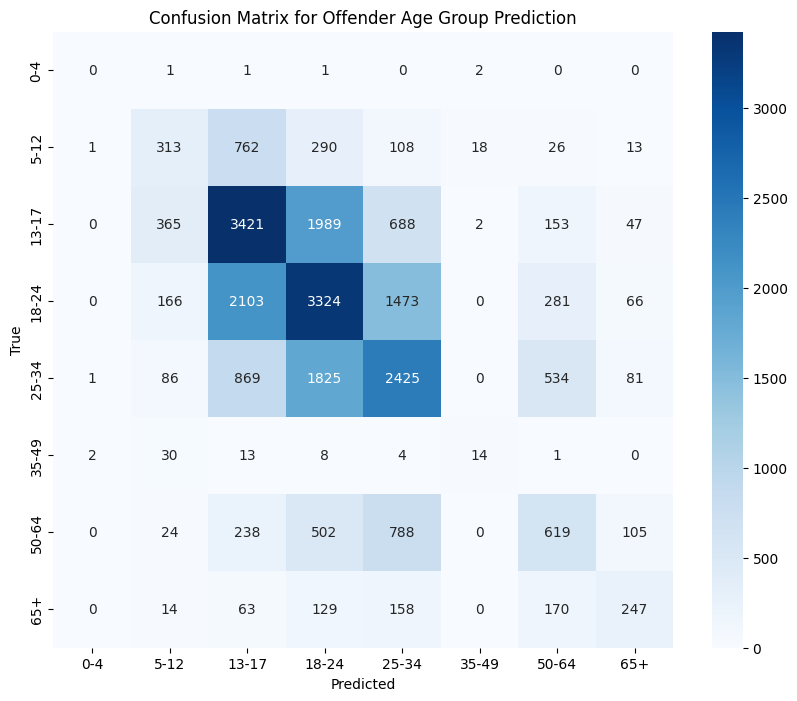

In [138]:
bins = [0, 4, 12, 17, 24, 34, 49, 64, 120]  # upper bound is 120 to cover all possible ages
labels = ['0-4', '5-12', '13-17', '18-24', '25-34', '35-49', '50-64', '65+']
df_virginia_solved['OffenderAgeGroup'] = pd.cut(df_virginia_solved['OffenderAge'], bins=bins, labels=labels)

# identify needed features and target variables

features = ['VictimAge', 'VictimSex', 'VictimRace', 'WeaponUsed',
            'VictimOffenderRelationship', 'CrimeCircumstance',
            'CrimeSituation', 'HomicideType', 'AdditionalOffenderCount',
            'AdditionalVictimCount']
target = 'OffenderAgeGroup'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['VictimSex', 'VictimRace', 'WeaponUsed',
                        'VictimOffenderRelationship',
                         'HomicideType','CrimeCircumstance','CrimeSituation']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge', 'AdditionalOffenderCount', 'AdditionalVictimCount']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)


# Align X_final and y before dropping NaNs to ensure they have the same index
X_final = X_final[y.notna()] # Keep only rows in X_final where y is not NaN
y = y[y.notna()]  # Keep only rows in y where y is not NaN

# Now you can safely drop NaNs from X_final without causing a mismatch
X_final = X_final.dropna()

# reset index to ensure both X and y have sequential index
X_final = X_final.reset_index(drop=True)
y = y.reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# train via randomforest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# evaluate outcome
y_pred = model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print(f'\nAccuracy score of the random forest classifier is {accuracy:.2f}%')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Offender Age Group Prediction')
plt.show()

## Finding out about the feature importance scores to determine which features are nice

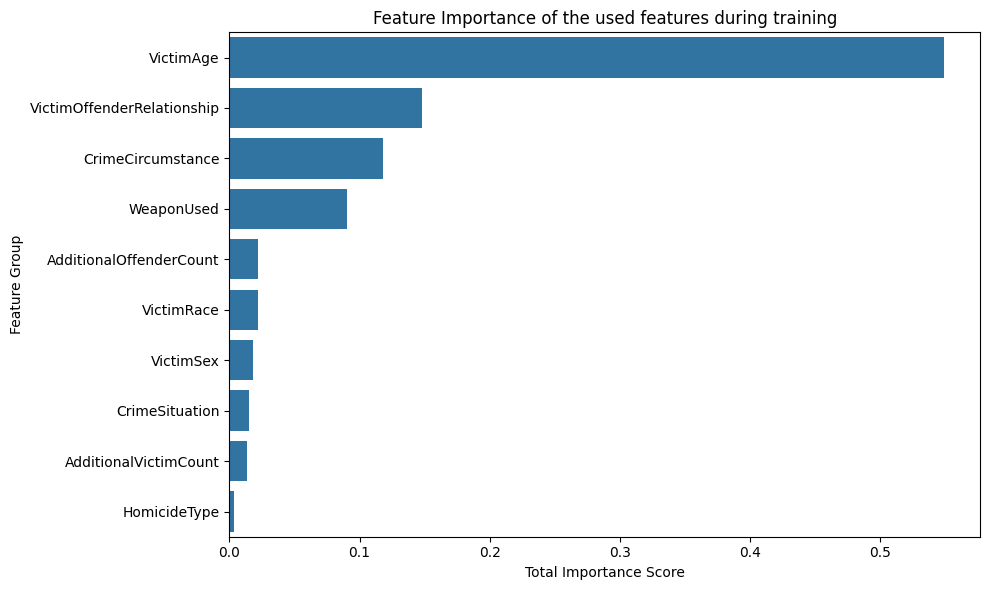

In [139]:
feature_importances = model.feature_importances_
feature_names = X_final.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Grouping dummy variables back to their original feature
feature_importance_df['BaseFeature'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])

grouped_importance = feature_importance_df.groupby('BaseFeature')['Importance'].sum().reset_index()
grouped_importance = grouped_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='BaseFeature', data=grouped_importance)
plt.xlabel('Total Importance Score')
plt.ylabel('Feature Group')
plt.title('Feature Importance of the used features during training')
plt.tight_layout()
plt.show()


# Dropping certain features with low feature importance: Remaining features with high importance are as follows:
- Victim Age
- WeaponUsed
- CrimeCircumstance
- VictimOffenderRelationship

## Testing whether accuracy increased after low importance features have been dropped


Accuracy score of the random forest classifier is 42.68%


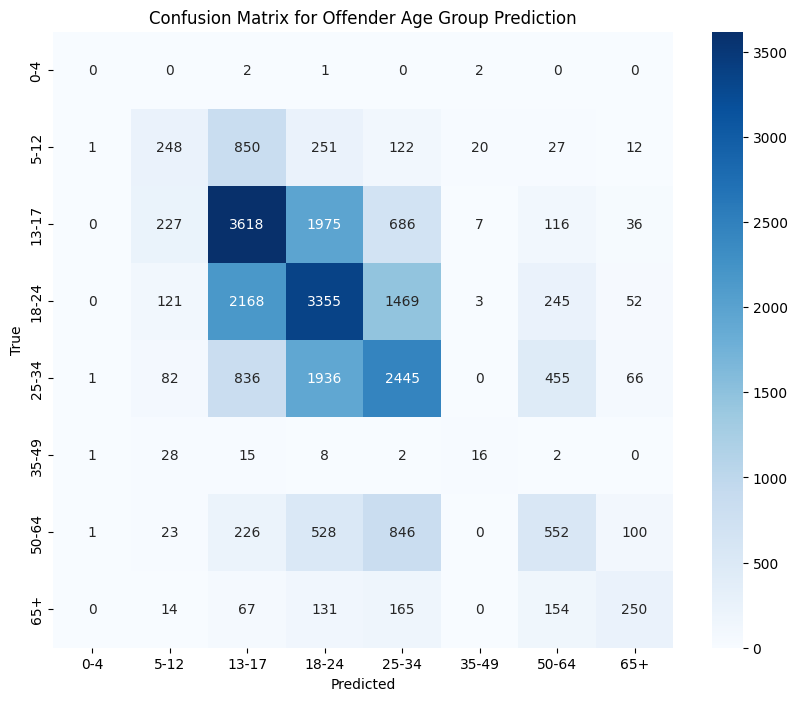

In [140]:
bins = [0, 4, 12, 17, 24, 34, 49, 64, 120]  # upper bound is 120 to cover all possible ages
labels = ['0-4', '5-12', '13-17', '18-24', '25-34', '35-49', '50-64', '65+']
df_virginia_solved.loc[:, 'OffenderAgeGroup'] = pd.cut(df_virginia_solved['OffenderAge'], bins=bins, labels=labels)

# identify needed features and target variables

features = ['VictimAge', 'WeaponUsed',
            'VictimOffenderRelationship', 'CrimeCircumstance']
target = 'OffenderAgeGroup'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['WeaponUsed',
                        'VictimOffenderRelationship',
                        'CrimeCircumstance']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

# Align X_final and y before dropping NaNs to ensure they have the same index
X_final = X_final[y.notna()] # Keep only rows in X_final where y is not NaN
y = y[y.notna()]  # Keep only rows in y where y is not NaN

# Now you can safely drop NaNs from X_final without causing a mismatch
X_final = X_final.dropna()

# reset index to ensure both X and y have sequential index
X_final = X_final.reset_index(drop=True)
y = y.reset_index(drop=True)


X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# train via randomforest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# evaluate outcome
y_pred = model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print(f'\nAccuracy score of the random forest classifier is {accuracy:.2f}%')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Offender Age Group Prediction')
plt.show()



## Fine tuning features with the best parameter combination previously found through grid-search

In [141]:
final_model_chosen = RandomForestClassifier(
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)
final_model_chosen.fit(X_train, y_train)
y_pred = final_model_chosen.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy score of the RandomForestClassifier: {accuracy:.2f}%')

Accuracy score of the RandomForestClassifier: 45.58%


## Turns out that predicting age is quite challenging, even by classifying age groups

## Attempt to predict and impute age groups to the unsolved dataset

In [142]:
X_unsolved_dummies = df_virginia_unsolved[categorical_features]
X_unsolved_encoded = pd.get_dummies(X_unsolved_dummies, drop_first=True)
X_unsolved_numeric = df_virginia_unsolved[['VictimAge']]

X_unsolved_final = pd.concat([X_unsolved_numeric, X_unsolved_encoded], axis=1)

# align features of the encoded dataset with the training set above so that prediction can be accurately carried out
def align_features(X_train, X_new):
    missing_cols = set(X_train.columns) - set(X_new.columns)
    for col in missing_cols:
        X_new[col] = 0
    extra_cols = set(X_new.columns) - set(X_train.columns)
    X_new = X_new.drop(columns=extra_cols)
    X_new = X_new[X_train.columns]
    return X_new
X_unsolved_final = align_features(X_final, X_unsolved_final)

# predict and fill in the predicted values
unsolved_predictions = model.predict(X_unsolved_final)
df_virginia_unsolved['Predicted_AgeGroup'] = unsolved_predictions
unsolved_probabilities = model.predict_proba(X_unsolved_final)
df_virginia_unsolved['Prob_0-4'] = np.round(unsolved_probabilities[:, 0], 2)*100
df_virginia_unsolved['Prob_13-17'] = np.round(unsolved_probabilities[:, 1], 2)*100
df_virginia_unsolved['Prob_18-24'] = np.round(unsolved_probabilities[:, 2], 2)*100
df_virginia_unsolved['Prob_25-34'] = np.round(unsolved_probabilities[:, 3], 2)*100
df_virginia_unsolved['Prob_35-49'] = np.round(unsolved_probabilities[:, 4], 2)*100
df_virginia_unsolved['Prob_5-12'] = np.round(unsolved_probabilities[:, 5], 2)*100
df_virginia_unsolved['Prob_50-64'] = np.round(unsolved_probabilities[:, 6], 2)*100
df_virginia_unsolved['Prob_65+'] = np.round(unsolved_probabilities[:, 7], 2)*100
print(model.classes_)
df_virginia_unsolved.iloc[:, 24:].head()


['0-4' '13-17' '18-24' '25-34' '35-49' '5-12' '50-64' '65+']


,Predicted_OffenderSex,Prob_Male,Prob_Female,Predicted_OffenderRace,Prob_Black,Prob_White,Prob_Asian,Prob_American Indian or Alaskan Native,Predicted_AgeGroup,Prob_0-4,Prob_13-17,Prob_18-24,Prob_25-34,Prob_35-49,Prob_5-12,Prob_50-64,Prob_65+
4482,Male,100.0,0.0,Black,100.0,0.0,0.0,0.0,18-24,0.0,14.0,52.0,26.0,5.0,0.0,1.0,1.0
4625,Male,98.0,2.0,Black,89.0,0.0,0.0,0.0,18-24,0.0,13.0,43.0,29.0,13.0,0.0,2.0,0.0
4627,Male,98.0,2.0,Black,94.0,0.0,0.0,0.0,18-24,0.0,0.0,83.0,14.0,3.0,0.0,0.0,0.0
4664,Male,100.0,0.0,Black,100.0,0.0,0.0,0.0,18-24,0.0,6.0,39.0,34.0,18.0,0.0,1.0,1.0
4682,Male,94.0,6.0,Black,98.0,0.0,0.0,0.0,18-24,0.0,20.0,43.0,19.0,9.0,0.0,0.0,9.0


## Training another random forest classifier model to predict <b>victim offender relationship</b>

Accuracy score of the random forest classifier is 44.59%


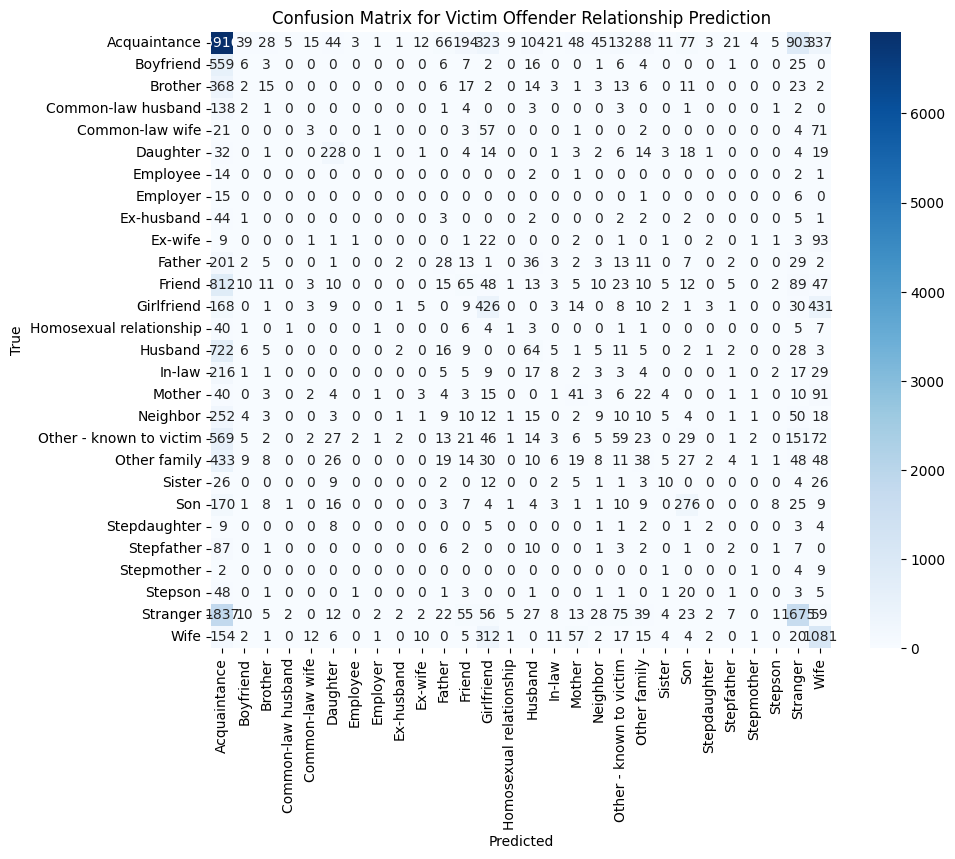

In [143]:

features = ['VictimAge', 'VictimSex', 'VictimRace', 'WeaponUsed',
            'CrimeCircumstance', 'CrimeSituation', 'HomicideType']
target = 'VictimOffenderRelationship'

y = df_virginia_solved[target]

# identify categorical features for one-hot encoding
categorical_features = ['VictimSex', 'VictimRace', 'WeaponUsed',
                         'HomicideType','CrimeCircumstance','CrimeSituation']

# one-hot encode the categorical variables
X_dummies = df_virginia_solved[categorical_features]
X_encoded = pd.get_dummies(X_dummies, drop_first=True)

# merge the dataset to include the numeric variable of Victim Age
X_numeric = df_virginia_solved[['VictimAge']]
X_final = pd.concat([X_numeric, X_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# train via randomforest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# evaluate outcome
y_pred = model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
relationship_labels = sorted(y_test.unique())
print(f'Accuracy score of the random forest classifier is {accuracy:.2f}%')
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=relationship_labels, yticklabels=relationship_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Victim Offender Relationship Prediction')
plt.show()



## Attempt to predict and impute data for the unsolved cases

In [144]:
X_unsolved_dummies = df_virginia_unsolved[categorical_features]
X_unsolved_encoded = pd.get_dummies(X_unsolved_dummies, drop_first=True)
X_unsolved_numeric = df_virginia_unsolved[['VictimAge']]

X_unsolved_final = pd.concat([X_unsolved_numeric, X_unsolved_encoded], axis=1)

# align features of the encoded dataset with the training set above so that prediction can be accurately carried out
def align_features(X_train, X_new):
    missing_cols = set(X_train.columns) - set(X_new.columns)
    for col in missing_cols:
        X_new[col] = 0
    extra_cols = set(X_new.columns) - set(X_train.columns)
    X_new = X_new.drop(columns=extra_cols)
    X_new = X_new[X_train.columns]
    return X_new
X_unsolved_final = align_features(X_final, X_unsolved_final)

# predict and fill in the predicted values
unsolved_predictions = model.predict(X_unsolved_final)
df_virginia_unsolved['Predicted_VictimOffenderRelationship'] = unsolved_predictions
unsolved_probabilities = model.predict_proba(X_unsolved_final)
for idx, relationship_class in enumerate(model.classes_):
    df_virginia_unsolved[f'Prob_{relationship_class}'] = np.round(unsolved_probabilities[:, idx], 2)*100
print(model.classes_)
df_virginia_unsolved.iloc[:, 24:].head()


['Acquaintance' 'Boyfriend' 'Brother' 'Common-law husband'
 'Common-law wife' 'Daughter' 'Employee' 'Employer' 'Ex-husband' 'Ex-wife'
 'Father' 'Friend' 'Girlfriend' 'Homosexual relationship' 'Husband'
 'In-law' 'Mother' 'Neighbor' 'Other - known to victim' 'Other family'
 'Sister' 'Son' 'Stepdaughter' 'Stepfather' 'Stepmother' 'Stepson'
 'Stranger' 'Wife']


,Predicted_OffenderSex,Prob_Male,Prob_Female,Predicted_OffenderRace,Prob_Black,Prob_White,Prob_Asian,Prob_American Indian or Alaskan Native,Predicted_AgeGroup,Prob_0-4,...,Prob_Other - known to victim,Prob_Other family,Prob_Sister,Prob_Son,Prob_Stepdaughter,Prob_Stepfather,Prob_Stepmother,Prob_Stepson,Prob_Stranger,Prob_Wife
4482,Male,100.0,0.0,Black,100.0,0.0,0.0,0.0,18-24,0.0,...,8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0
4625,Male,98.0,2.0,Black,89.0,0.0,0.0,0.0,18-24,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0
4627,Male,98.0,2.0,Black,94.0,0.0,0.0,0.0,18-24,0.0,...,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0
4664,Male,100.0,0.0,Black,100.0,0.0,0.0,0.0,18-24,0.0,...,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0
4682,Male,94.0,6.0,Black,98.0,0.0,0.0,0.0,18-24,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,88.0


In [145]:
df_virginia_unsolved.iloc[:, 40:].head()

,Prob_65+,Predicted_VictimOffenderRelationship,Prob_Acquaintance,Prob_Boyfriend,Prob_Brother,Prob_Common-law husband,Prob_Common-law wife,Prob_Daughter,Prob_Employee,Prob_Employer,...,Prob_Other - known to victim,Prob_Other family,Prob_Sister,Prob_Son,Prob_Stepdaughter,Prob_Stepfather,Prob_Stepmother,Prob_Stepson,Prob_Stranger,Prob_Wife
4482,1.0,Acquaintance,57.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0
4625,0.0,Acquaintance,54.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0
4627,0.0,Stranger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0
4664,1.0,Acquaintance,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0
4682,9.0,Wife,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,88.0


In [146]:
df_virginia_unsolved['Predicted_VictimOffenderRelationship'].value_counts()

,count
Predicted_VictimOffenderRelationship,
Acquaintance,769
Stranger,234
Other - known to victim,49
Wife,38
Other family,24
Friend,23
Girlfriend,23
Son,18
Father,11


In [151]:
df_virginia_unsolved['CountyFIPS'].unique()

array(['Jefferson, AL', 'Mobile, AL', 'Montgomery, AL', 'Houston, AL',
       'Madison, AL', 'Russell, AL', 'Tallapoosa, AL', 'Tuscaloosa, AL',
       'Columbia, AR', 'Craighead, AR', 'Crittenden, AR', 'Faulkner, AR',
       'Franklin, AR', 'Garland, AR', 'Hempstead, AR', 'Miller, AR',
       'Mississippi, AR', 'Monroe, AR', 'Ouachita, AR', 'Pulaski, AR',
       'Sebastian, AR', 'Alachua, FL', 'Baker, FL', 'Bay, FL',
       'Brevard, FL', 'Broward, FL', 'Citrus, FL', 'Clay, FL',
       'Collier, FL', 'Columbia, FL', 'Miami-Dade, FL', 'Duval, FL',
       'Escambia, FL', 'Flagler, FL', 'Gadsden, FL', 'Hamilton, FL',
       'Hardee, FL', 'Hendry, FL', 'Hernando, FL', 'Highlands, FL',
       'Hillsborough, FL', 'Jackson, FL', 'Lake, FL', 'Lee, FL',
       'Leon, FL', 'Madison, FL', 'Manatee, FL', 'Marion, FL',
       'Martin, FL', 'Monroe, FL', 'Okaloosa, FL', 'Orange, FL',
       'Osceola, FL', 'Palm Beach, FL', 'Pasco, FL', 'Pinellas, FL',
       'Polk, FL', 'Putnam, FL', 'St. Johns, FL'

# Using geopy to geolocate the county names of the unsolved cases and visualize the suspect demographics

In [153]:
import time
import folium

county_coords = {
    'Jefferson, AL': (33.5543, -86.8965),
    'Mobile, AL': (30.6954, -88.0399),
    'Montgomery, AL': (32.3617, -86.2792),
    'Houston, AL': (31.1460, -85.3927),
    'Madison, AL': (34.7280, -86.5861),
    'Russell, AL': (32.2880, -85.1894),
    'Tallapoosa, AL': (32.8067, -85.7989),
    'Tuscaloosa, AL': (33.2098, -87.5692),
    'Columbia, AR': (33.2130, -93.2260),
    'Craighead, AR': (35.8301, -90.6320),
    'Crittenden, AR': (35.2066, -90.3089),
    'Faulkner, AR': (35.0740, -92.4123),
    'Franklin, AR': (35.4875, -93.8927),
    'Garland, AR': (34.5559, -93.1770),
    'Hempstead, AR': (33.7464, -93.6620),
    'Miller, AR': (33.3337, -93.6750),
    'Mississippi, AR': (35.7570, -90.1316),
    'Monroe, AR': (34.6550, -91.1870),
    'Ouachita, AR': (33.5880, -92.8786),
    'Pulaski, AR': (34.7465, -92.2896),
    'Sebastian, AR': (35.1910, -94.2383),
    'Alachua, FL': (29.6516, -82.3248),
    'Baker, FL': (30.3931, -82.3018),
    'Bay, FL': (30.1805, -85.6846),
    'Brevard, FL': (28.2639, -80.7214),
    'Broward, FL': (26.1901, -80.3659),
    'Citrus, FL': (28.8849, -82.5186),
    'Clay, FL': (29.9944, -81.7787),
    'Collier, FL': (26.0690, -81.4279),
    'Columbia, FL': (30.1813, -82.6051),
    'Miami-Dade, FL': (25.7617, -80.1918),
    'Duval, FL': (30.3322, -81.6557),
    'Escambia, FL': (30.3960, -87.2916),
    'Flagler, FL': (29.4086, -81.2519),
    'Gadsden, FL': (30.5563, -84.6479),
    'Hamilton, FL': (30.4860, -82.9502),
    'Hardee, FL': (27.5048, -81.8200),
    'Hendry, FL': (26.6100, -81.0755),
    'Hernando, FL': (28.5578, -82.3886),
    'Highlands, FL': (27.3400, -81.3400),
    'Hillsborough, FL': (27.9944, -82.4451),
    'Jackson, FL': (30.7159, -85.1894),
    'Lake, FL': (28.7028, -81.7787),
    'Lee, FL': (26.6630, -81.9535),
    'Leon, FL': (30.4383, -84.2807),
    'Madison, FL': (30.4694, -83.4123),
    'Manatee, FL': (27.4799, -82.3452),
    'Marion, FL': (29.2108, -82.0738),
    'Martin, FL': (27.0805, -80.4100),
    'Monroe, FL': (24.5557, -81.7826),
    'Okaloosa, FL': (30.5773, -86.6611),
    'Orange, FL': (28.4845, -81.2519),
    'Osceola, FL': (28.1010, -81.0755),
    'Palm Beach, FL': (26.7056, -80.0364),
    'Pasco, FL': (28.3232, -82.4319),
    'Pinellas, FL': (27.8764, -82.7779),
    'Polk, FL': (27.8616, -81.6912),
    'Putnam, FL': (29.6580, -81.7787),
    'St. Johns, FL': (29.9711, -81.4279),
    'St. Lucie, FL': (27.2730, -80.3503),
    'Sarasota, FL': (27.3364, -82.5307),
    'Seminole, FL': (28.7030, -81.2079),
    'Sumter, FL': (28.7030, -82.0955),
    'Taylor, FL': (30.0124, -83.5818),
    'Volusia, FL': (29.0270, -81.0755),
    'Bibb, GA': (32.8407, -83.6324),
    'Burke, GA': (33.0882, -81.9535),
    'Carroll, GA': (33.5801, -85.0766),
    'Clayton, GA': (33.5572, -84.3750),
    'Cobb, GA': (33.8999, -84.5641),
    'Colquitt, GA': (31.2078, -83.7890),
    'De Kalb, GA': (33.7956, -84.2279),
    'Effingham, GA': (32.3640, -81.3610),
    'Evans, GA': (32.1610, -81.9054),
    'Fulton, GA': (33.8034, -84.3963),
    'Gwinnett, GA': (33.9191, -84.0160),
    'Heard, GA': (33.2962, -85.1471),
    'Henry, GA': (33.4357, -84.1469),
    'Lowndes, GA': (30.8333, -83.2785),
    'Rockdale, GA': (33.6752, -84.0379),
    'Campbell, KY': (39.0837, -84.3963),
    'Daviess, KY': (37.7450, -87.1133),
    'Jefferson, KY': (38.2542, -85.7594),
    'Pulaski, KY': (37.1060, -84.5880),
    'Scott, KY': (38.2098, -84.5588),
    'Natchitoches, LA': (31.7600, -93.0863),
    'Rapides, LA': (31.1390, -92.3980),
    'St. Martin, LA': (30.1200, -91.8320),
    'St. Tammany, LA': (30.4357, -89.9253),
    'Orleans, LA': (29.9511, -90.0715),
    'Anne Arundel, MD': (38.9530, -76.5488),
    'Harford, MD': (39.5830, -76.3637),
    "Prince George's, MD": (38.7849, -76.8721),
    'Washington, MD': (39.6418, -77.7199),
    'Baltimore city, MD': (39.2904, -76.6122),
    'Alamance, NC': (36.0480, -79.4069),
    'Durham, NC': (35.9940, -78.8986),
    'Forsyth, NC': (36.0999, -80.2442),
    'Gaston, NC': (35.2633, -81.1873),
    'Granville, NC': (36.3092, -78.6115),
    'Harnett, NC': (35.3500, -78.8500),
    'Johnston, NC': (35.5074, -78.3467),
    'Mecklenburg, NC': (35.2271, -80.8431),
    'Pitt, NC': (35.6266, -77.3664),
    'Surry, NC': (36.3930, -80.6848),
    'Beaufort, SC': (32.4316, -80.6698),
    'Charleston, SC': (32.7765, -79.9311),
    'Clarendon, SC': (33.6784, -80.1875),
    'Colleton, SC': (32.9020, -80.6660),
    'Darlington, SC': (34.2990, -79.8762),
    'Dillon, SC': (34.4150, -79.3712),
    'Dorchester, SC': (33.0132, -80.1756),
    'Greenville, SC': (34.8526, -82.3940),
    'Horry, SC': (33.9197, -78.9288),
    'Jasper, SC': (32.4910, -81.0070),
    'Richland, SC': (34.0007, -81.0348)
}



df_virginia_unsolved['Coordinates'] = df_virginia_unsolved['CountyFIPS'].map(county_coords)
df_virginia_unsolved['Latitude'] = df_virginia_unsolved['Coordinates'].apply(lambda x: x[0] if pd.notnull(x) else None)
df_virginia_unsolved['Longitude'] = df_virginia_unsolved['Coordinates'].apply(lambda x: x[1] if pd.notnull(x) else None)

race_color = {
    'Black':'black',
    'White':'white',
    'Asian':'orange',
    'American India or Alaskan Native':'red'
}

m = folium.Map(location=[37.5, -78.7], zoom_start=7)
race_color = {
    'Black': 'black',
    'White': 'pink',
    'Asian': 'orange',
    'American Indian or Alaskan Native': 'red',
}


for idx, row in df_virginia_unsolved.iterrows():
    if pd.isnull(row['Latitude']) or pd.isnull(row['Longitude']):
        continue

    color = race_color.get(row['Predicted_OffenderRace'], 'gray')
    icon_type = 'male' if row['Predicted_OffenderSex'] == 'Male' else 'female'
    age = row['Predicted_AgeGroup']

    popup_text = (
        f"<b>Sex:</b> {row['Predicted_OffenderSex']}<br>"
        f"<b>Race:</b> {row['Predicted_OffenderRace']}<br>"
        f"<b>Age Group:</b> {age}<br>"
        f"<b>Victim Offender Relationship:</b> {row['Predicted_VictimOffenderRelationship']}"
    )

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color=color, icon=icon_type, prefix='fa')
    ).add_to(m)

m.save('virginia_predicted_offenders_map.html')

# Final HTML map that showcases the distribution of the unsolved cases across Virginia, as well as popups containing relevant demographic information regarding each potential suspect

- Pink: White
- Black: African American
- Orange: Asian
- Red: American Indian

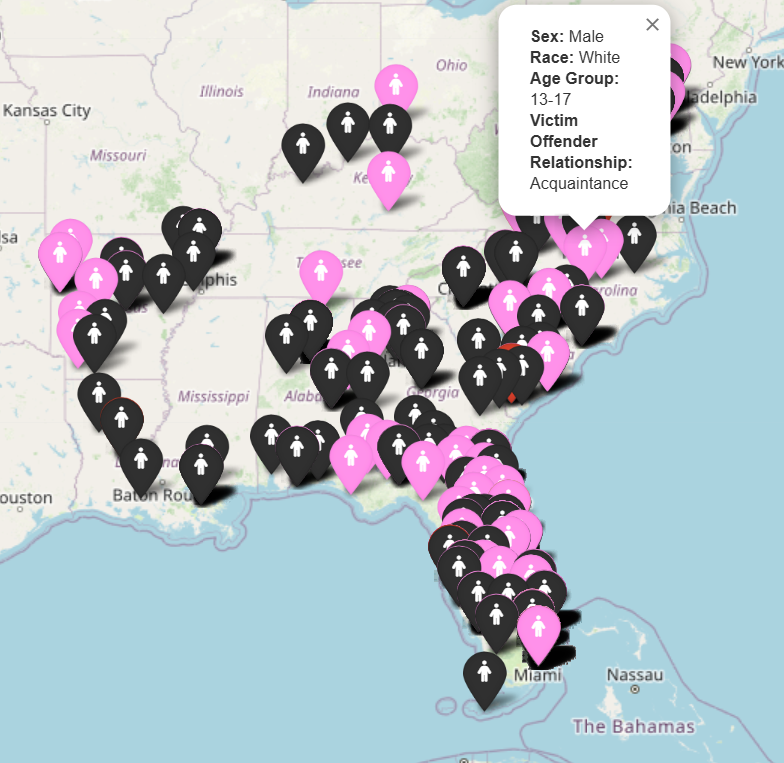

In [155]:
from IPython.display import Image, display

display(Image('Demographic_Map.png'))

# Visualizing results of the predicted demographic

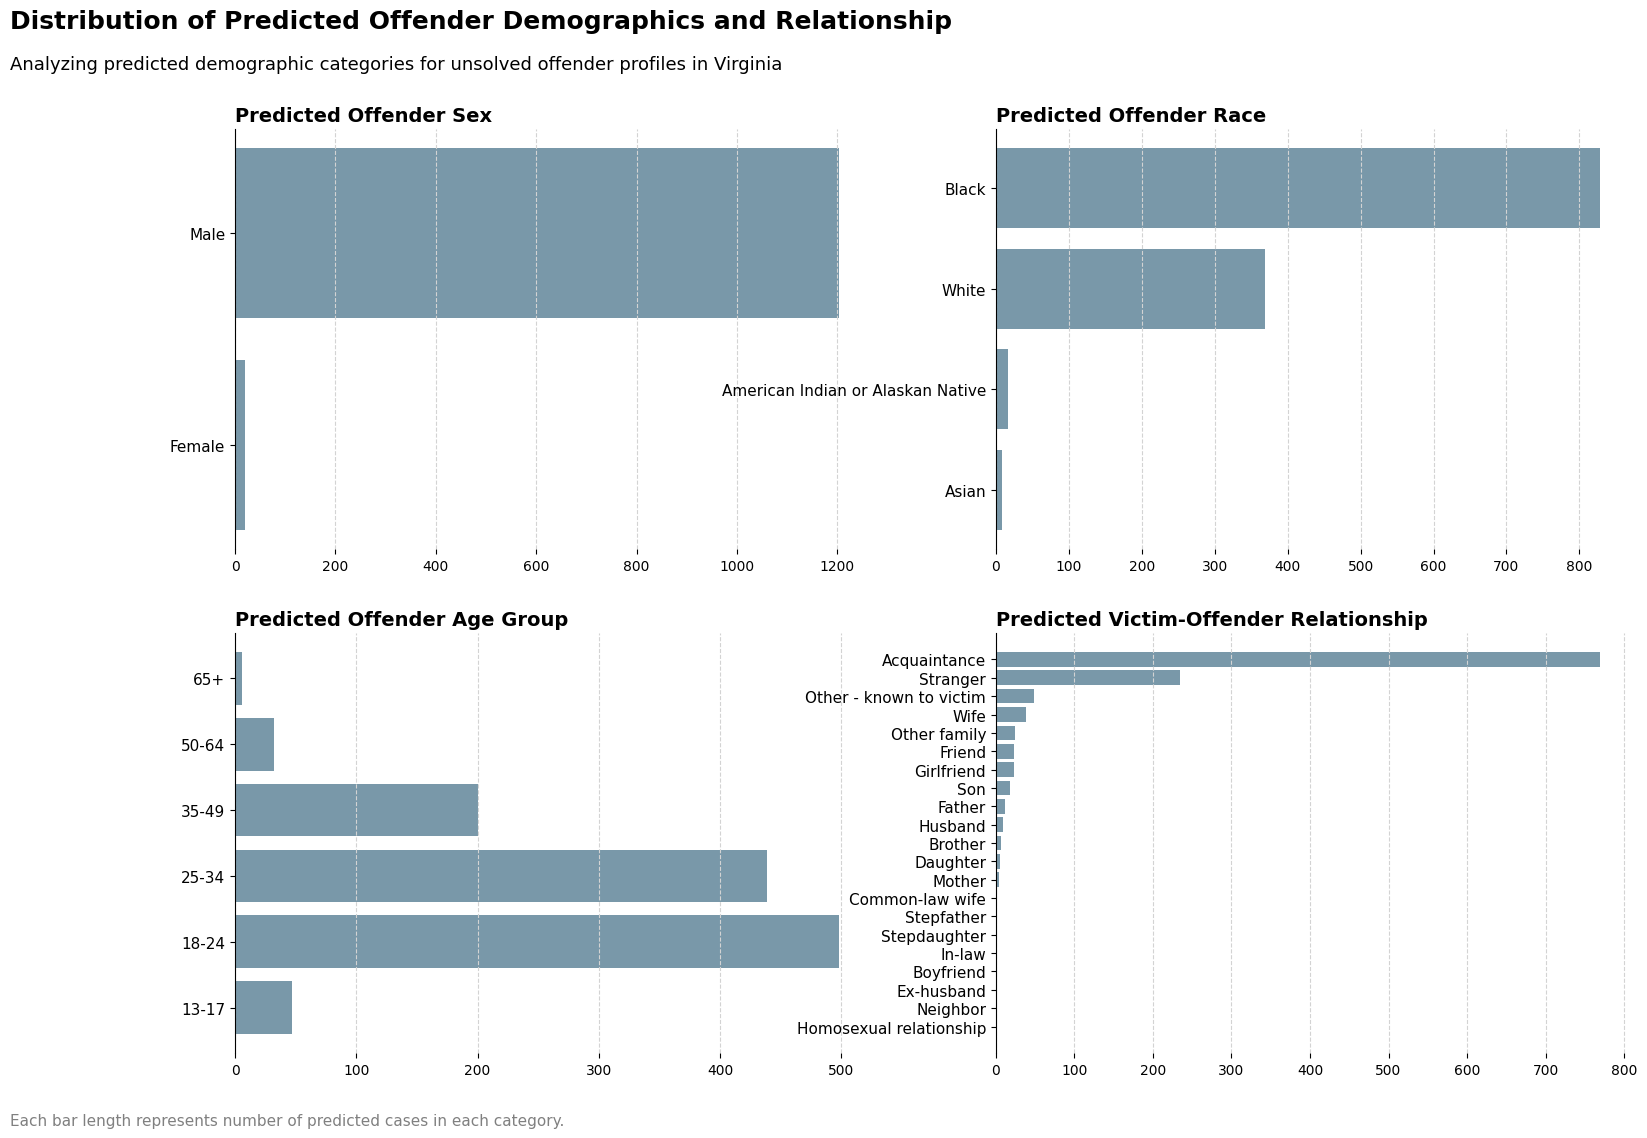

In [154]:
bar_color = '#7998A9'  # Single color for all charts
bar_width = 0.6

sex_counts = df_virginia_unsolved['Predicted_OffenderSex'].value_counts().sort_values(ascending=True)

race_counts = df_virginia_unsolved['Predicted_OffenderRace'].value_counts().sort_values(ascending=True)

agegroup_order = ['0-4', '5-12', '13-17', '18-24', '25-34', '35-49', '50-64', '65+']
age_counts = df_virginia_unsolved['Predicted_AgeGroup'].value_counts().reindex(agegroup_order).dropna()

relationship_counts = df_virginia_unsolved['Predicted_VictimOffenderRelationship'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(18, 12))
plt.tight_layout()
plt.subplots_adjust(top=0.88)

plt.suptitle("Distribution of Predicted Offender Demographics and Relationship", fontsize=18, fontweight='bold', x=0.0, ha='left')
plt.figtext(0.0, 0.93, "Analyzing predicted demographic categories for unsolved offender profiles in Virginia", fontsize=13, ha='left')
plt.figtext(0.0, 0.05, "Each bar length represents number of predicted cases in each category.", fontsize=11, color='grey', ha='left')

ax1 = plt.subplot(2, 2, 1)
y1 = np.arange(len(sex_counts))
ax1.barh(y1, sex_counts.values, color=bar_color)
ax1.set_yticks(y1)
ax1.set_yticklabels(sex_counts.index, fontsize=11)
ax1.set_title('Predicted Offender Sex', fontsize=14, fontweight='bold', loc='left')
ax1.grid(axis='x', linestyle='--', color='lightgrey')

ax2 = plt.subplot(2, 2, 2)
y2 = np.arange(len(race_counts))
ax2.barh(y2, race_counts.values, color=bar_color)
ax2.set_yticks(y2)
ax2.set_yticklabels(race_counts.index, fontsize=11)
ax2.set_title('Predicted Offender Race', fontsize=14, fontweight='bold', loc='left')
ax2.grid(axis='x', linestyle='--', color='lightgrey')

ax3 = plt.subplot(2, 2, 3)
y3 = np.arange(len(age_counts))
ax3.barh(y3, age_counts.values, color=bar_color)
ax3.set_yticks(y3)
ax3.set_yticklabels(age_counts.index, fontsize=11)
ax3.set_title('Predicted Offender Age Group', fontsize=14, fontweight='bold', loc='left')
ax3.grid(axis='x', linestyle='--', color='lightgrey')

ax4 = plt.subplot(2, 2, 4)
y4 = np.arange(len(relationship_counts))
ax4.barh(y4, relationship_counts.values, color=bar_color)
ax4.set_yticks(y4)
ax4.set_yticklabels(relationship_counts.index, fontsize=11)
ax4.set_title('Predicted Victim-Offender Relationship', fontsize=14, fontweight='bold', loc='left')
ax4.grid(axis='x', linestyle='--', color='lightgrey')

for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.show()


In [150]:
df_virginia_unsolved.to_csv('Suspect_Demographic_Prediction.csv')